## Observations and Insights 

In [174]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")


In [175]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [176]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [177]:
# Combine the data into a single dataset
py_merge_df=mouse_metadata.merge(study_results, on='Mouse ID')

# Display the data table for preview
py_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [178]:
# Checking the number of mice.
len(set(py_merge_df["Mouse ID"].values))

249

In [179]:
py_merge_df.duplicated(subset=['Mouse ID','Timepoint']).value_counts()

False    1888
True        5
dtype: int64

In [180]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
py_merge_df[py_merge_df.duplicated(subset=['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [181]:
# Optional: Get all the data for the duplicate mouse ID. (==)
py_merge_df[py_merge_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [182]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#filtered dataframe
cleanpy_merge_df=py_merge_df[py_merge_df['Mouse ID']!='g989']
cleanpy_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [183]:
 # Checking the number of mice in the clean DataFrame.
len(set(cleanpy_merge_df["Mouse ID"].values))

248

## Summary Statistics

In [184]:
cleanpy_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [185]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby to find mean for each drug

cleanpy_merge_df.groupby('Drug Regimen')
mean_drug = cleanpy_merge_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

#median of the tumor volume
median_drug = cleanpy_merge_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

# #variance of the tumor volume
Var_drug = cleanpy_merge_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

# #standard deviation of the tumor volume
std_drug = cleanpy_merge_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

# #SEM of the tumor volume
sem_drug = cleanpy_merge_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [186]:
 # Assemble the resulting series into a single summary dataframe.
TV_Summary = pd.DataFrame({
    "Mean":mean_drug, 
    "Median":median_drug,
    "Variance":Var_drug,
    "Standard Deviation":std_drug,
    "SEM":sem_drug
    })
TV_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [187]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

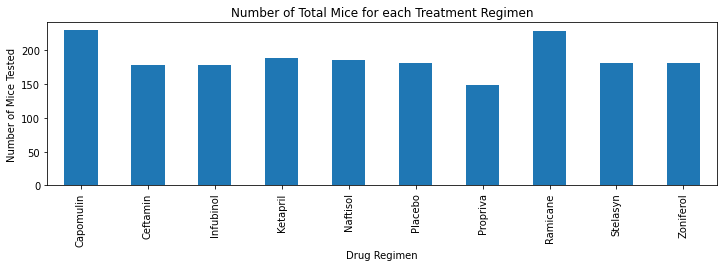

In [188]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
dr_mouseid = cleanpy_merge_df.groupby('Drug Regimen').count()['Mouse ID']

dr_mouseid = cleanpy_merge_df.groupby('Drug Regimen').count()['Mouse ID']

dr_mouseid_chart = dr_mouseid.plot(kind="bar", title="Number of Total Mice for each Treatment Regimen", figsize=(12,3))
dr_mouseid_chart.set_ylabel("Number of Mice Tested")


In [189]:
dr_mouseid = cleanpy_merge_df.groupby('Drug Regimen').count()['Mouse ID']

#creating a dataframe 
mouseid_df = pd.DataFrame({
    "Number of Mice per Test":dr_mouseid, 
    })
mouseid_df

,Number of Mice per Test
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [190]:
# Set x axis and tick locations
plt.figure(figsize=(12,3))
x_axis = np.arange(len(mouseid_df))
y_data = mouseid_df['Number of Mice per Test']
tick_locations = [value for value in x_axis]


<Figure size 864x216 with 0 Axes>

Text(0, 0.5, 'Number of Mice per Test')

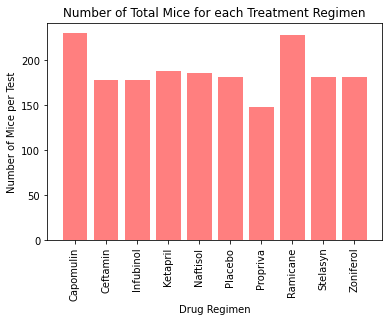

In [191]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(x_axis,y_data, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations,mouseid_df.index.values, rotation="vertical")
plt.title("Number of Total Mice for each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Test")

In [192]:
gender_group = cleanpy_merge_df.groupby("Sex").nunique()['Mouse ID']

#creating a dataframe 
Gen_df = pd.DataFrame({
    "Count of mice":gender_group, 
    },
    index=['Female', 'Male'])
    


<AxesSubplot:ylabel='Count of mice'>

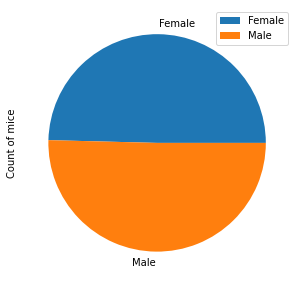

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gen_df.plot.pie(y='Count of mice', figsize=(5, 5))

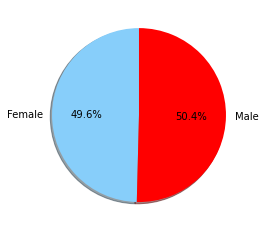

In [194]:

# Labels for the sections of our pie chart
labels = ["Female", "Male"]
# The values of each section of the pie chart; how big are the chunks of my pie?
sizes = [123, 125]
# The colors of each section of the pie chart
colors = ["lightskyblue","red"]
explode = (0,0)
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_mouse = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

In [195]:
new_clean_df = cleanpy_merge_df.copy()

## Quartiles, Outliers and Boxplots

In [196]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# grouped_tp = cleanpy_merge_df.groupby(['Drug Regimen','Mouse ID']).agg({'Timepoint': ['max']})
# grouped_tp

grouped_tp = new_clean_df.groupby('Mouse ID').agg({'Timepoint': ['max']})
grouped_tp = grouped_tp.reset_index()
grouped_tp.columns=['Mouse ID', 'Timepoint']

grouped_tp


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [197]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_treat_merge = pd.merge(new_clean_df, grouped_tp, on=['Mouse ID','Timepoint'], how='inner')
new_treat_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [198]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_tv = new_treat_merge.loc[new_treat_merge['Drug Regimen'] == 'Capomulin'].iloc[:,6]
ramicane_tv = new_treat_merge.loc[new_treat_merge['Drug Regimen'] == 'Ramicane'].iloc[:,6]
infubinol_tv = new_treat_merge.loc[new_treat_merge['Drug Regimen'] == 'Infubinol'].iloc[:,6]
ceftamin_tv = new_treat_merge.loc[new_treat_merge['Drug Regimen'] == 'Ceftamin'].iloc[:,6]

# Create empty list to fill with tumor vol data (for plotting)
drugs = [capomulin_tv, ramicane_tv, infubinol_tv, ceftamin_tv]

#specified list

list_lquantile = []
list_uquantile = []
list_interquantile = []
list_lowbound = []
list_upperbound = []

for drug in drugs:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartile = drug.quantile([0.25,0.5,0.75])
    
    l_quantile = round(quartile[0.25],1)
   
    u_quantile = round(quartile[0.75], 1)
    
    interquantile = round(u_quantile - l_quantile, 1)
    
    low_bound = round(l_quantile - (1.5 * interquantile), 1)
    
    upper_bound = round(u_quantile + (1.5 * interquantile), 1)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    list_lquantile.append(l_quantile)
    list_uquantile.append(u_quantile)
    list_interquantile.append(interquantile)
    list_lowbound.append(low_bound)
    list_upperbound.append(upper_bound)

list_lquantile
  
    # Determine outliers using upper and lower bounds
    

[32.4, 31.6, 54.0, 48.7]

In [199]:
Summary = pd.DataFrame({
    "Drug Names":["Capomulin", "Ramicane", "Infubinol","Ceftamin"], 
    "Lower Quantile":list_lquantile,
    "Upper Quantile":list_uquantile,
    "Interquantile": list_interquantile,
    "Lower Bound": list_lowbound,
    "Upper Bound":list_upperbound
    })
Summary

,Drug Names,Lower Quantile,Upper Quantile,Interquantile,Lower Bound,Upper Bound
0,Capomulin,32.4,40.2,7.8,20.7,51.9
1,Ramicane,31.6,40.7,9.1,18.0,54.4
2,Infubinol,54.0,65.5,11.5,36.8,82.8
3,Ceftamin,48.7,64.3,15.6,25.3,87.7


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9853737ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98537441c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9853737760>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9853744880>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9853744be0>,
 'means': []}

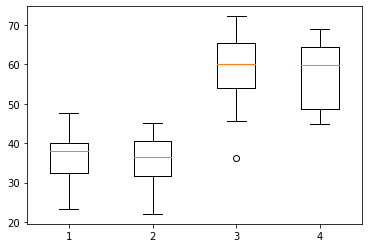

In [200]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drugs)

## Line and Scatter Plots

In [201]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#graph a single mouse

In [202]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#group weight and avg tumor vol

## Correlation and Regression

In [203]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
